In [5]:
import pandas as pd


tesla_df = pd.read_csv("Tesla.csv - Tesla.csv.csv")

print(tesla_df.head())


        Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001


Running basic GBM simulation...


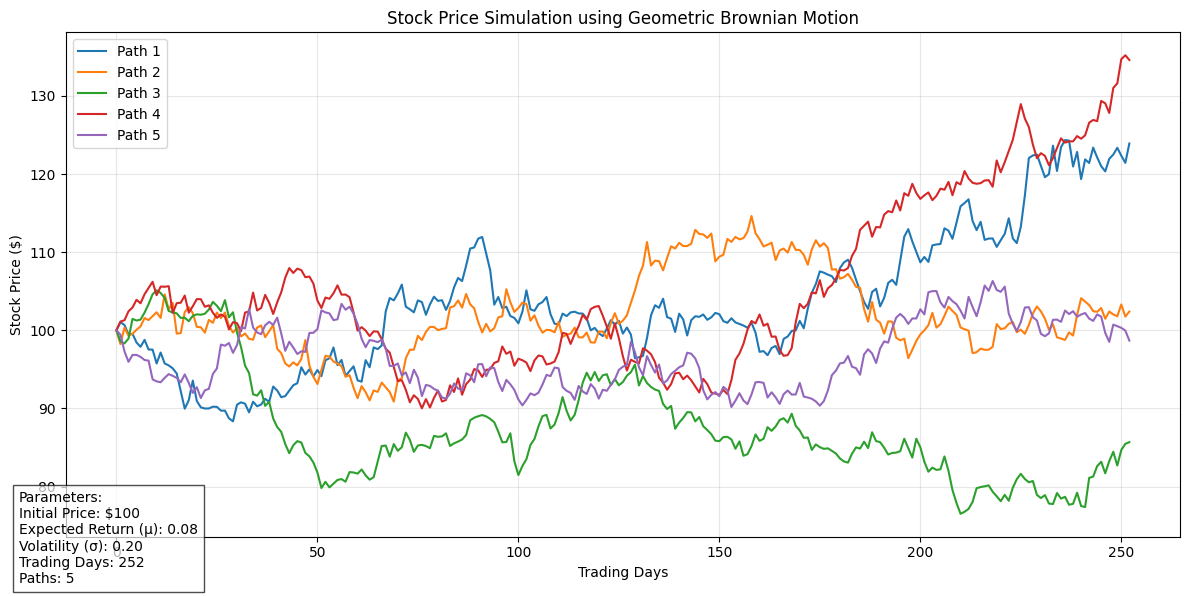


Simulation Statistics:
mean_final: 109.05
median_final: 102.40
min_final: 85.69
max_final: 134.59
std_final: 17.72
return_mean: 0.09
return_std: 0.18


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from ipywidgets import interact, FloatSlider, IntSlider, fixed

def simulate_gbm(initial_price, mu, sigma, days, dt, paths):
    """
    Simulate stock price paths using Geometric Brownian Motion
    
    Parameters:
    -----------
    initial_price : float
        Initial stock price
    mu : float
        Expected annual return (drift)
    sigma : float
        Annual volatility
    days : int
        Number of trading days to simulate
    dt : float
        Time step as a fraction of a year (e.g., 1/252 for daily)
    paths : int
        Number of simulation paths to generate
        
    Returns:
    --------
    numpy.ndarray
        Array of shape (days+1, paths) containing price paths
    """
    # Number of time steps
    steps = int(days)
    
    # Initialize price array
    prices = np.zeros((steps + 1, paths))
    prices[0] = initial_price
    
    # Generate random normal numbers for all steps and paths at once
    random_normal = np.random.normal(0, 1, (steps, paths))
    
    # GBM formula: S(t+dt) = S(t) * exp((mu - 0.5 * sigma^2) * dt + sigma * sqrt(dt) * Z)
    drift = (mu - 0.5 * sigma**2) * dt
    diffusion = sigma * np.sqrt(dt)
    
    # Simulate all paths step by step
    for t in range(1, steps + 1):
        prices[t] = prices[t-1] * np.exp(drift + diffusion * random_normal[t-1])
    
    return prices

def plot_gbm_simulations(initial_price=100, mu=0.08, sigma=0.2, days=252, paths=5):
    """
    Plot stock price simulations using Geometric Brownian Motion
    
    Parameters:
    -----------
    initial_price : float
        Initial stock price
    mu : float
        Expected annual return (drift)
    sigma : float
        Annual volatility
    days : int
        Number of trading days to simulate
    paths : int
        Number of simulation paths to generate
    """
    # Daily time steps (1/252 is a common approximation for daily steps in a year)
    dt = 1/252
    
    # Generate simulations
    prices = simulate_gbm(initial_price, mu, sigma, days, dt, paths)
    
    # Create time points
    time_points = np.arange(days + 1)
    
    # Set up the plot
    plt.figure(figsize=(12, 6))
    
    # Plot each path
    for i in range(paths):
        plt.plot(time_points, prices[:, i], label=f'Path {i+1}')
    
    # Add labels and title
    plt.xlabel('Trading Days')
    plt.ylabel('Stock Price ($)')
    plt.title('Stock Price Simulation using Geometric Brownian Motion')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Add text box with parameters
    param_text = f'Parameters:\nInitial Price: ${initial_price}\nExpected Return (μ): {mu:.2f}\nVolatility (σ): {sigma:.2f}\nTrading Days: {days}\nPaths: {paths}'
    plt.figtext(0.02, 0.02, param_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    return prices

def interactive_gbm_simulator():
    """
    Create an interactive GBM simulator using ipywidgets
    Note: This function works in Jupyter notebooks
    """
    interact(
        plot_gbm_simulations,
        initial_price=FloatSlider(min=10, max=1000, step=10, value=100, description='Initial Price:'),
        mu=FloatSlider(min=-0.5, max=0.5, step=0.01, value=0.08, description='Return (μ):'),
        sigma=FloatSlider(min=0.01, max=1, step=0.01, value=0.2, description='Volatility (σ):'),
        days=IntSlider(min=10, max=1000, step=10, value=252, description='Trading Days:'),
        paths=IntSlider(min=1, max=20, step=1, value=5, description='Paths:')
    )

def calculate_statistics(prices):
    """
    Calculate statistics for the simulated price paths
    
    Parameters:
    -----------
    prices : numpy.ndarray
        Array of shape (days+1, paths) containing price paths
        
    Returns:
    --------
    dict
        Dictionary containing various statistics
    """
    final_prices = prices[-1, :]
    
    stats = {
        'mean_final': np.mean(final_prices),
        'median_final': np.median(final_prices),
        'min_final': np.min(final_prices),
        'max_final': np.max(final_prices),
        'std_final': np.std(final_prices),
        'return_mean': np.mean(final_prices / prices[0, 0] - 1),
        'return_std': np.std(final_prices / prices[0, 0] - 1)
    }
    
    return stats

def animate_gbm(initial_price=100, mu=0.08, sigma=0.2, days=252, paths=5, interval=50):
    """
    Create an animation of GBM stock price paths evolving over time
    
    Parameters:
    -----------
    initial_price : float
        Initial stock price
    mu : float
        Expected annual return (drift)
    sigma : float
        Annual volatility
    days : int
        Number of trading days to simulate
    paths : int
        Number of simulation paths to generate
    interval : int
        Animation interval in milliseconds
    """
    # Daily time steps
    dt = 1/252
    
    # Generate simulations
    prices = simulate_gbm(initial_price, mu, sigma, days, dt, paths)
    
    # Create time points
    time_points = np.arange(days + 1)
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Set up lines (one for each path)
    lines = [ax.plot([], [], label=f'Path {i+1}')[0] for i in range(paths)]
    
    # Set up axis labels and title
    ax.set_xlabel('Trading Days')
    ax.set_ylabel('Stock Price ($)')
    ax.set_title('Stock Price Simulation using Geometric Brownian Motion (Animated)')
    
    # Text for parameters
    param_text = f'Parameters:\nInitial Price: ${initial_price}\nExpected Return (μ): {mu:.2f}\nVolatility (σ): {sigma:.2f}'
    text_box = ax.text(0.02, 0.02, param_text, transform=ax.transAxes, fontsize=10, 
                       bbox=dict(facecolor='white', alpha=0.7))
    
    # Set up the x and y limits
    ax.set_xlim(0, days)
    min_price = max(0, np.min(prices) * 0.9)
    max_price = np.max(prices) * 1.1
    ax.set_ylim(min_price, max_price)
    
    # Enable grid
    ax.grid(True, alpha=0.3)
    
    # Init function for the animation
    def init():
        for line in lines:
            line.set_data([], [])
        return lines
    
    # Animation function
    def animate(i):
        # Update each line with data up to frame i
        for j, line in enumerate(lines):
            line.set_data(time_points[:i+1], prices[:i+1, j])
        return lines
    
    # Create the animation
    anim = FuncAnimation(fig, animate, frames=days+1, init_func=init, blit=True, interval=interval)
    
    # Show legend
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    return anim

# Example usage
if __name__ == "__main__":
    # Simple simulation and plot
    print("Running basic GBM simulation...")
    prices = plot_gbm_simulations(initial_price=100, mu=0.08, sigma=0.2, days=252, paths=5)
    
    # Calculate and print statistics
    stats = calculate_statistics(prices)
    print("\nSimulation Statistics:")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}")

In [7]:
def compare_real_vs_gbm(real_df, mu, sigma, paths=5):
    """
    Compare actual Tesla data with GBM simulations
    """
    real_df = real_df.sort_values(by='Date')
    real_prices = real_df['Close'].values
    days = len(real_prices) - 1
    dt = 1 / 252
    initial_price = real_prices[0]

    # Simulate GBM
    simulated = simulate_gbm(initial_price, mu, sigma, days, dt, paths)
    time = np.arange(days + 1)

    # Plot real vs simulated
    plt.figure(figsize=(12, 6))
    plt.plot(time, real_prices, 'k-', linewidth=2, label='Actual Tesla Price')
    for i in range(paths):
        plt.plot(time, simulated[:, i], alpha=0.6, label=f'Sim {i+1}')
    plt.xlabel('Trading Days')
    plt.ylabel('Price ($)')
    plt.title('Tesla Actual vs GBM Simulated Prices')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


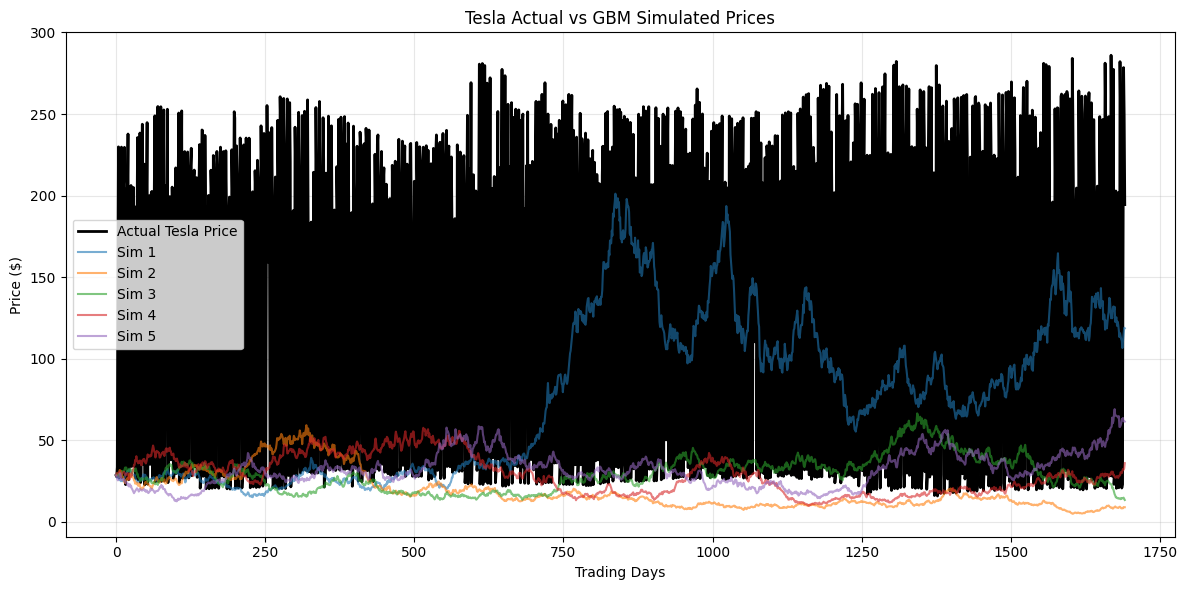

In [8]:
compare_real_vs_gbm(tesla_df, mu=0.3, sigma=0.6, paths=5)


In [9]:
tesla_df['log_return'] = np.log(tesla_df['Close'] / tesla_df['Close'].shift(1))
mu_est = tesla_df['log_return'].mean() * 252
sigma_est = tesla_df['log_return'].std() * np.sqrt(252)
print(f"Estimated mu: {mu_est:.4f}, sigma: {sigma_est:.4f}")


Estimated mu: 0.3566, sigma: 0.5192


Statistical Summary:
              Open         High          Low        Close        Volume  \
count  1692.000000  1692.000000  1692.000000  1692.000000  1.692000e+03   
mean    132.441572   134.769698   129.996223   132.428658  4.270741e+06   
std      94.309923    95.694914    92.855227    94.313187  4.295971e+06   
min      16.139999    16.629999    14.980000    15.800000  1.185000e+05   
25%      30.000000    30.650000    29.215000    29.884999  1.194350e+06   
50%     156.334999   162.370002   153.150002   158.160004  3.180700e+06   
75%     220.557495   224.099999   217.119999   220.022503  5.662100e+06   
max     287.670013   291.420013   280.399994   286.040009  3.716390e+07   

         Adj Close  
count  1692.000000  
mean    132.428658  
std      94.313187  
min      15.800000  
25%      29.884999  
50%     158.160004  
75%     220.022503  
max     286.040009  

Daily Return Summary:
count    1691.000000
mean        0.959079
std         2.223513
min        -0.927505
25%    

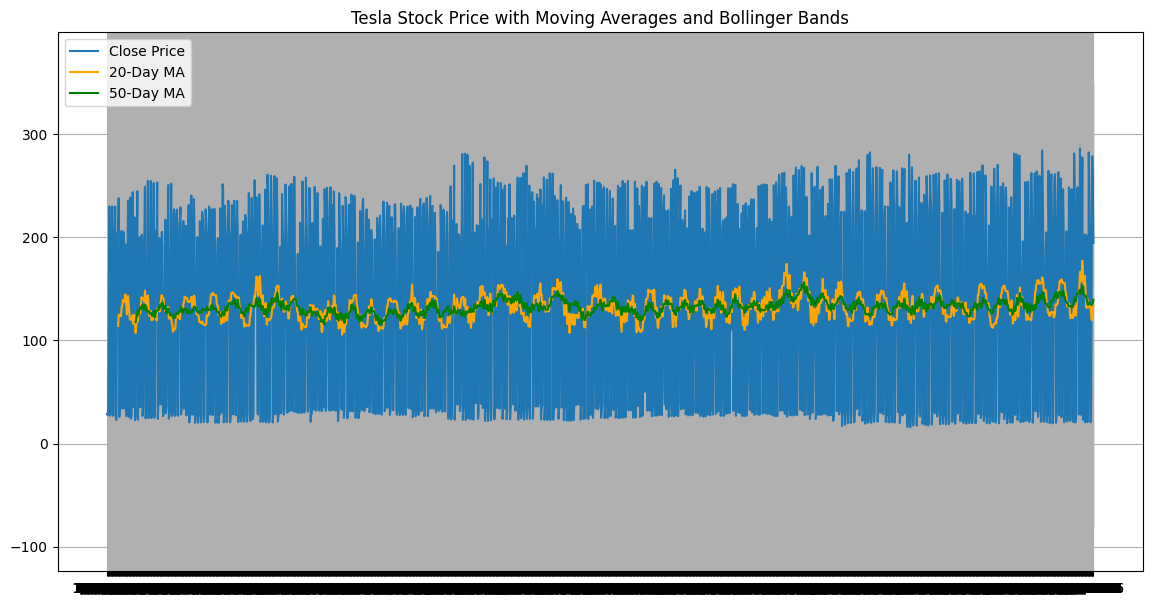

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Tesla.csv - Tesla.csv.csv")

df.sort_values('Date', inplace=True)

# Set Date as index
df.set_index('Date', inplace=True)

# --- 1. Statistical Summary ---
print("Statistical Summary:")
print(df.describe())

# --- 2. Daily Returns ---
df['Daily Return'] = df['Close'].pct_change()
print("\nDaily Return Summary:")
print(df['Daily Return'].describe())

# --- 3. Cumulative Return ---
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

# --- 4. Technical Indicators ---
# Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Bollinger Bands
df['Upper Band'] = df['MA20'] + 2 * df['Close'].rolling(window=20).std()
df['Lower Band'] = df['MA20'] - 2 * df['Close'].rolling(window=20).std()

# --- 5. Plot Technical Indicators ---
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA20'], label='20-Day MA', color='orange')
plt.plot(df['MA50'], label='50-Day MA', color='green')
plt.fill_between(df.index, df['Upper Band'], df['Lower Band'], color='grey', alpha=0.3)
plt.title('Tesla Stock Price with Moving Averages and Bollinger Bands')
plt.legend()
plt.grid(True)
plt.show()


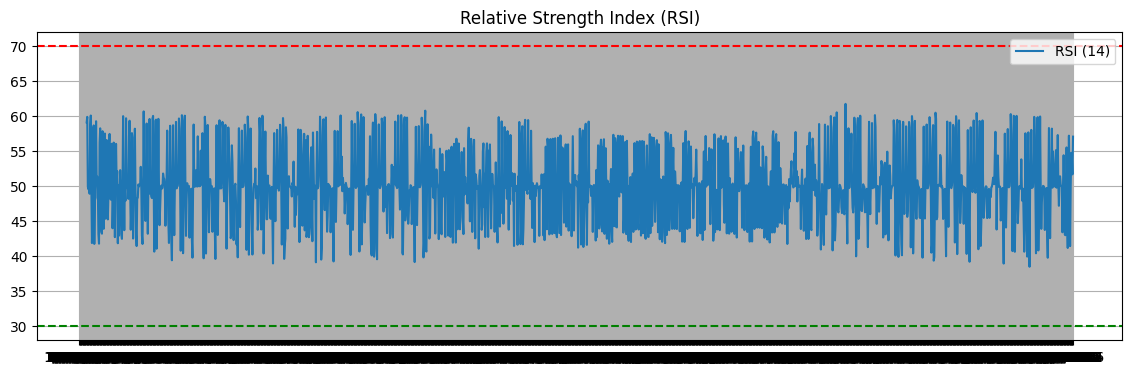

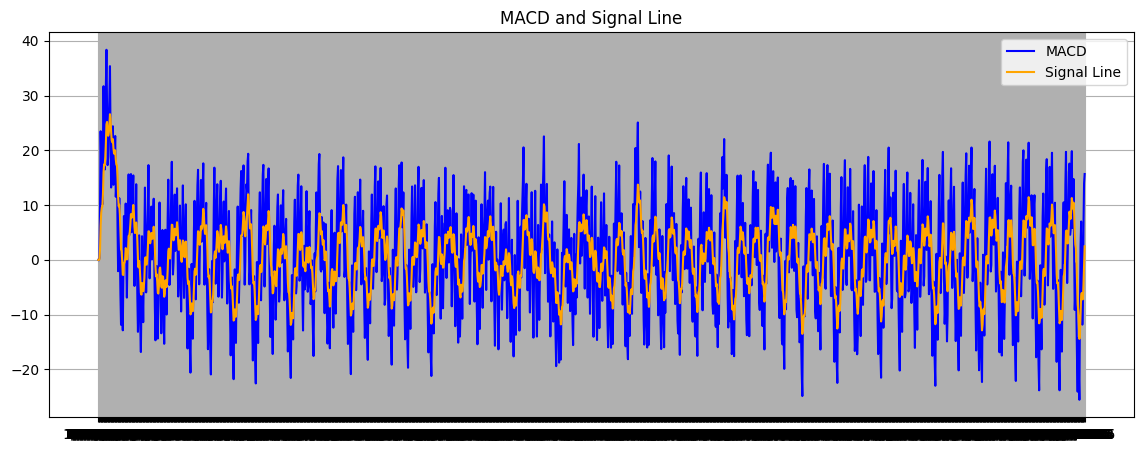

In [13]:
# --- 6. RSI (Relative Strength Index) ---
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

df['RSI'] = compute_rsi(df['Close'])

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(df['RSI'], label='RSI (14)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)
plt.show()

# --- 7. MACD (Moving Average Convergence Divergence) ---
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD
plt.figure(figsize=(14, 5))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['Signal Line'], label='Signal Line', color='orange')
plt.title('MACD and Signal Line')
plt.legend()
plt.grid(True)
plt.show()
